In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio

## As imagens utilizadas nesse notebook estão disponível em : 
[Link para as imagens no github](https://github.com/pedrodsk/pdi/tree/master/imgs_pdi)
* Atenção a cédula abaixo para a posição das imagens, um nível anterior ao notebook e na pasta imgs_pdi

In [3]:
imgs_list = glob.glob('../imgs_pdi/*')

In [4]:
imgs_list.sort()

In [5]:
for img in enumerate(imgs_list):
    print(img)

(0, '../imgs_pdi/aorta.jpg')
(1, '../imgs_pdi/bolas_original.png')
(2, '../imgs_pdi/conjunto-de-bola-colorida-dos-desenhos-animados-bolas-de-esporte-s-isolado_263016-1.jpg')
(3, '../imgs_pdi/cubo_magico.jpg')
(4, '../imgs_pdi/fpb.png')
(5, '../imgs_pdi/hsv_python.png')
(6, '../imgs_pdi/joelho.jpg')
(7, '../imgs_pdi/leao.jpeg')
(8, '../imgs_pdi/limao_amarelo.jpg')
(9, '../imgs_pdi/moedas04.jpg')
(10, '../imgs_pdi/montanha.jpg')
(11, '../imgs_pdi/paisagem.jpg')
(12, '../imgs_pdi/pedestres02.jpg')
(13, '../imgs_pdi/pelagem.jpg')
(14, '../imgs_pdi/pre-historia01.jpeg')
(15, '../imgs_pdi/pre-historia02.jpeg')
(16, '../imgs_pdi/psicopata.jpg')
(17, '../imgs_pdi/rainbow-fruits.jpg')


* Selecionar a imagem para todas as questões de acordo o index da lista acima

In [6]:
img_path = imgs_list[2]
img_gray = cv2.imread(img_path, 0)
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

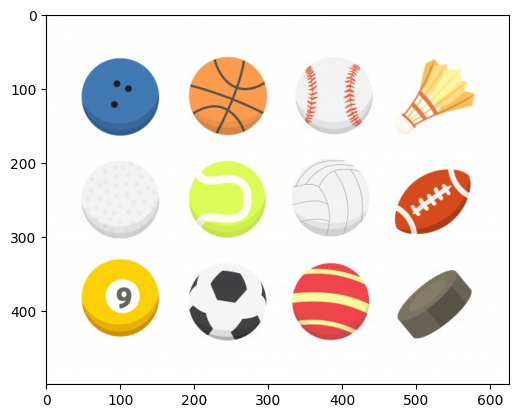

In [7]:
plt.imshow(img_rgb)

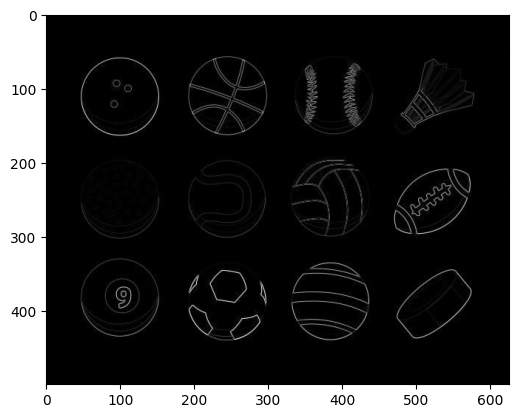

In [8]:
from scipy import ndimage
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
roberts_a = img_gray.astype('float64')
roberts_a/=255.0
#roberts_a_mean = cv2.medianBlur(roberts_a,3)
vertical = ndimage.convolve( roberts_a, roberts_cross_v )
horizontal = ndimage.convolve( roberts_a, roberts_cross_h )

borda_roberts_a = np.sqrt( np.square(horizontal) + np.square(vertical))
borda_roberts_a*=255

plt.imshow(borda_roberts_a, cmap='gray')


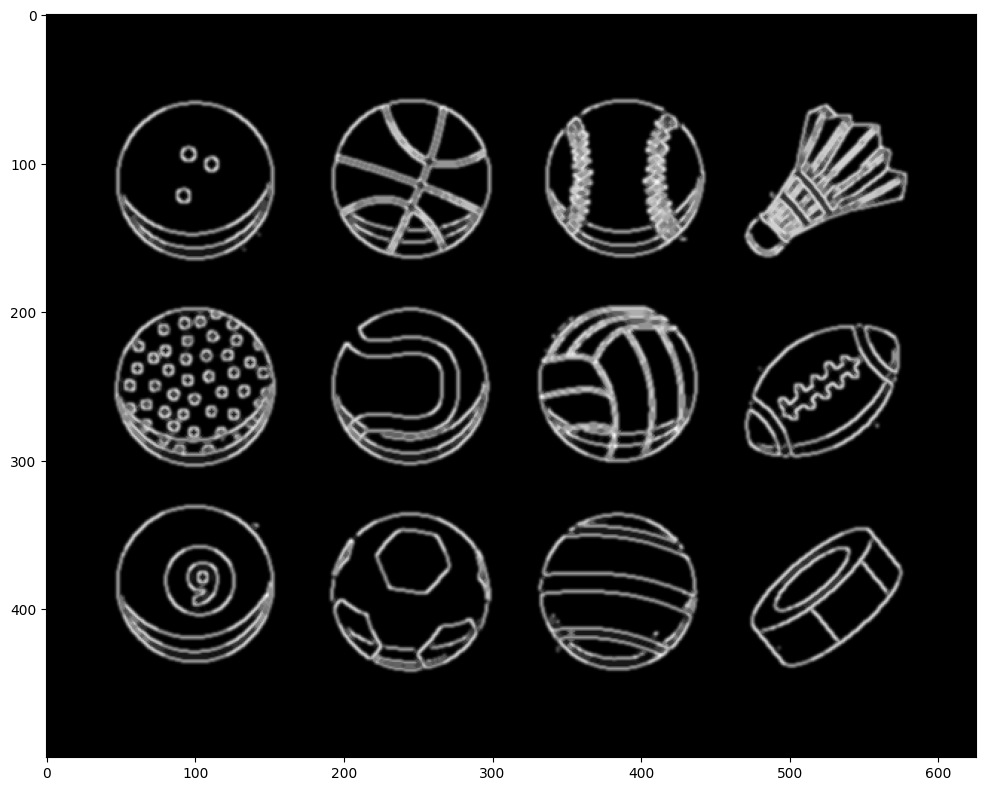

In [9]:
plt.figure(figsize=(12,12))
bordas = cv2.Canny(img_gray, 255, 255, apertureSize=5)

img = cv2.GaussianBlur(bordas, (5,5), 0)
kernelSize = (3,3)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernelSize)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')

In [10]:
contours,hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

12

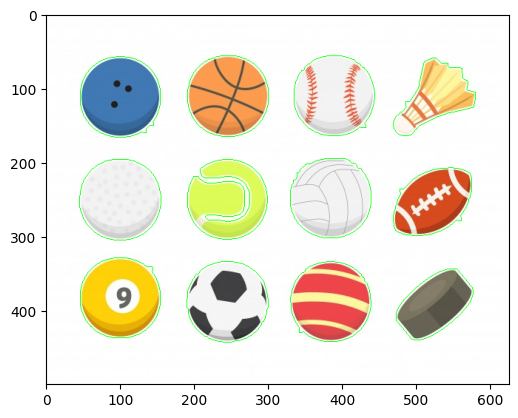

In [11]:
bordas2 = img_rgb.copy()
cv2.drawContours(bordas2, contours, -1, (0,255,0), 1)
plt.imshow(bordas2, cmap='gray')

In [12]:
def plot_object(i):
    cnt = contours[i]
    mask = np.zeros_like(img_rgb)
    mask[:,:,:] = 255
    cv2.drawContours(mask, [cnt], 0, (0, 0, 0), 1)
    cv2.fillPoly(mask, [cnt], color=(0,0,0))
    segmentation = cv2.bitwise_or(img_rgb, mask)
    fig, ax = plt.subplots(1,2, figsize=(12,12))
    ax[0].axis('off')
    ax[0].imshow(mask)
    ax[1].axis('off')
    ax[1].imshow(segmentation) 

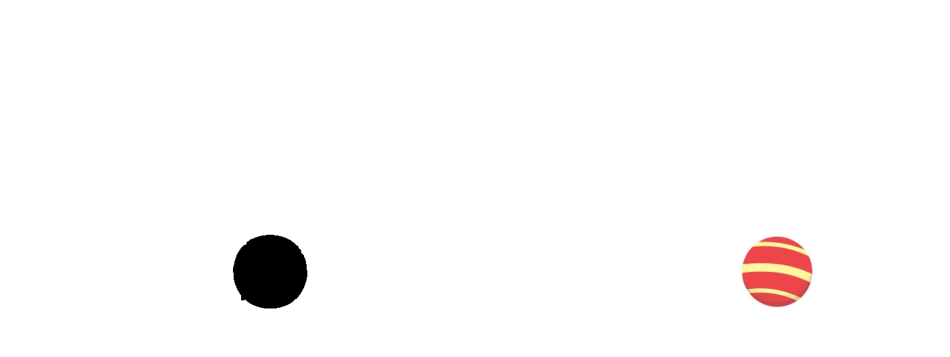

In [13]:
plot_object(1)

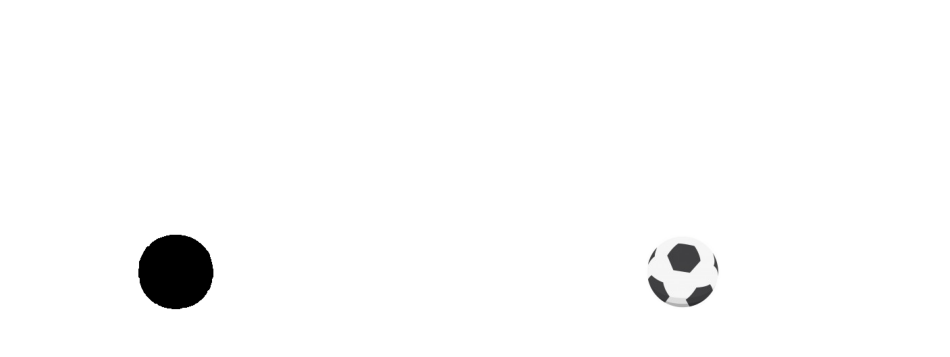

In [14]:
plot_object(2)

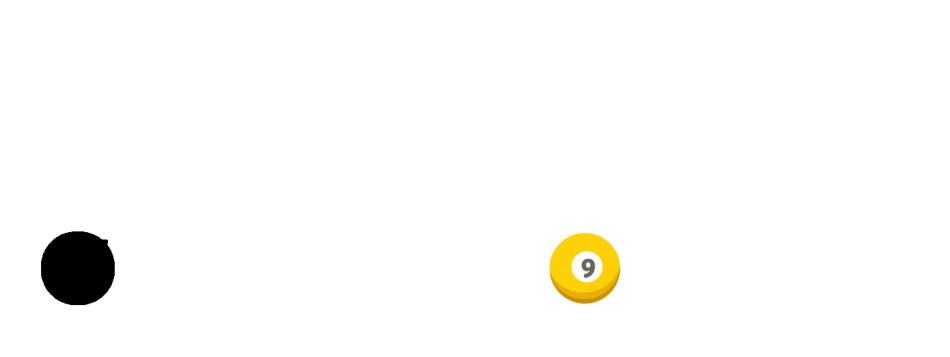

In [15]:
plot_object(3)

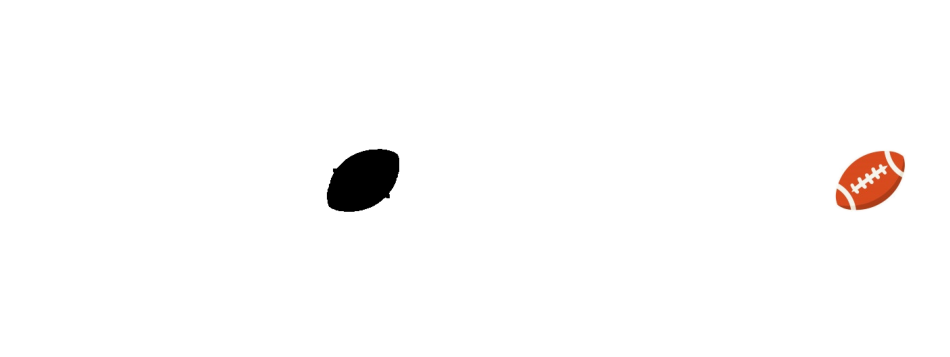

In [16]:
plot_object(4)

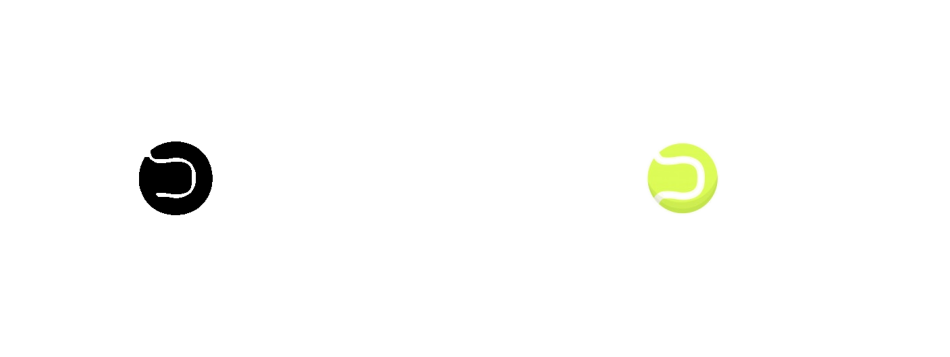

In [17]:
plot_object(5)

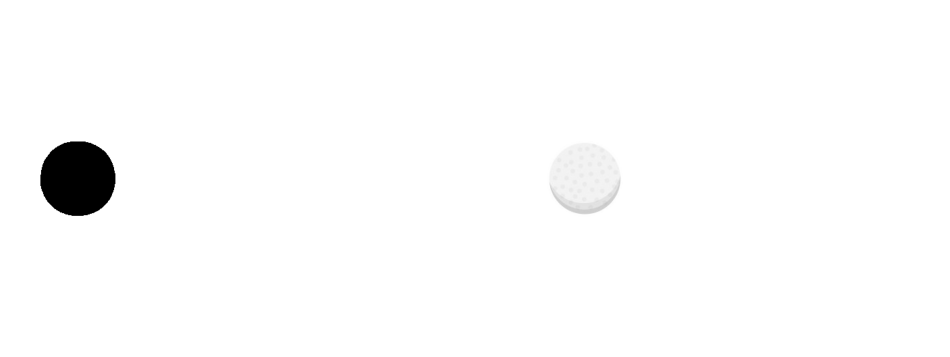

In [18]:
plot_object(6)

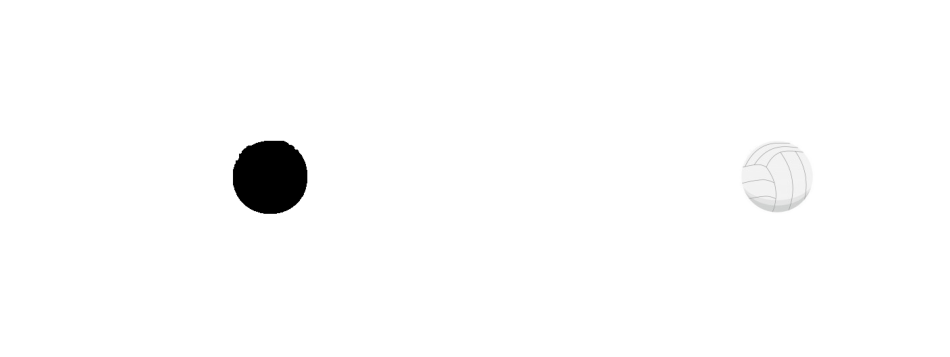

In [19]:
plot_object(7)

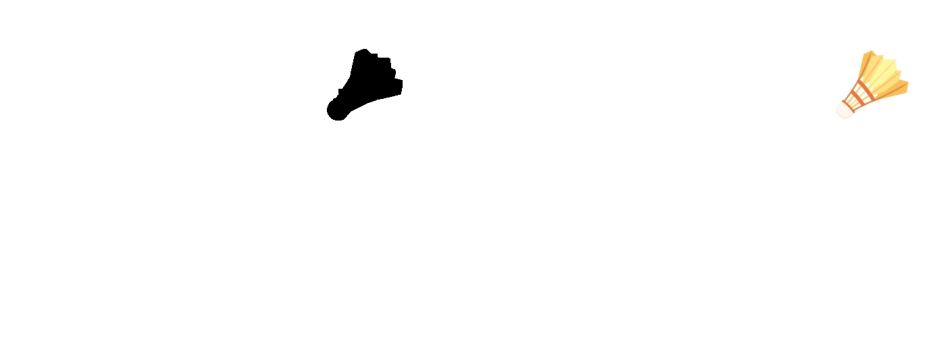

In [20]:
plot_object(8)

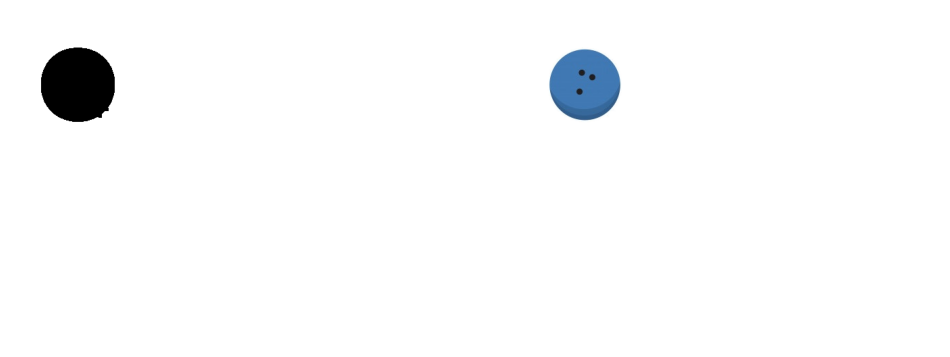

In [21]:
plot_object(9)

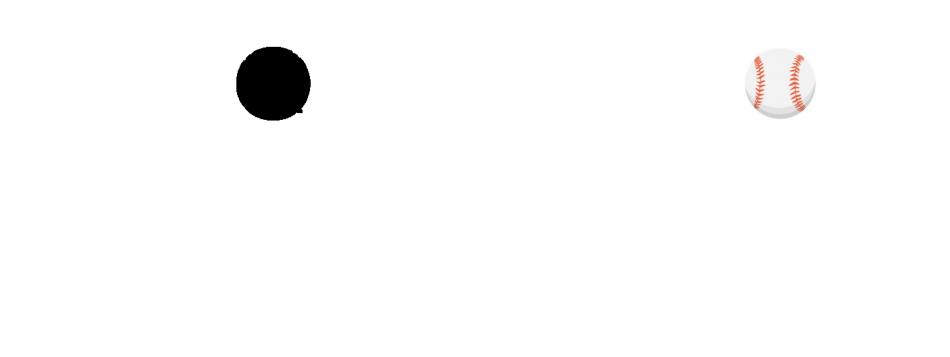

In [22]:
plot_object(10)

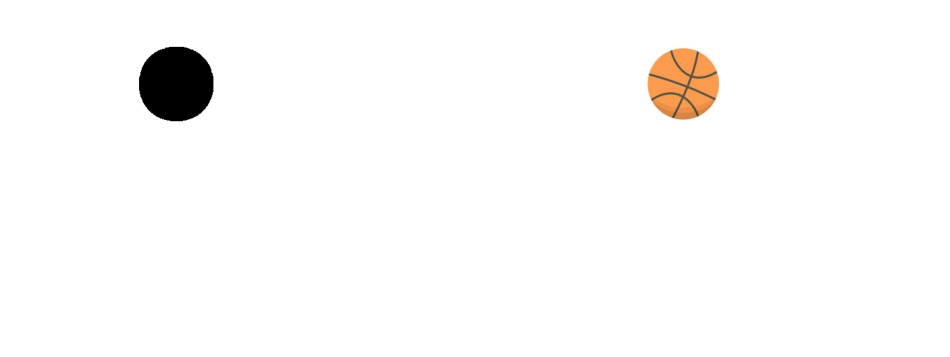

In [23]:
plot_object(11)